# SI 618 Homework #4

## Taylor Swift songs

Last updated 2024-13-02

The dataset for this assignment is from https://www.kaggle.com/datasets/jarredpriester/taylor-swift-spotify-dataset/data.

**NOTE**: Use the dataset from Canvas rather than the dataset from Kaggle, which is updated frequently and may change while you are completing this assignment.

This dataset consist of data from Spotify's API on all albums listed on Spotify for Taylor Swift. I set up the dataset to update monthly so that if any albums get added it will get added to the dataset too. At first it may look like there are song duplicates but I checked and all song IDs are unique.

The columns in this dataset are:

name - the name of the song

album - the name of the album

release_date - the day month and year the album was released

track number - the order the song appears on the album

id - the Spotify id for the song

uri - the Spotify uri for the song

acousticness - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

danceability - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

energy - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

instrumentalness - Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

liveness - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

loudness - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

speechiness - detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

tempo - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

valence - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

popularity - the popularity of the song from 0 to 100

duration_ms - The duration of the track in milliseconds.

We are going to refer to the tracks' properties of danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, and valence as "features" of the tracks.



Points will be allocated according to the following rubric:

- 90-100%: Question is correctly and completely answered.  Answer consists of well-written code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines and is 
accompanied by a written interpretation in a Markdown block.  Written interpretation does not contain spelling, grammar or stylistic errors (see [Strunk & White](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view?usp=sharing) for a detailed specifications).  Minor problems, such as formatting, incorrect submissions, missing names, etc. will result in less than 100%.
- 75-85% : Answer is mostly complete and correct; two or fewer noticeable omissions or errors.  Minor stylistic flaws, either in code or in
written interpretation.
- 50-70%: Answer has significant omissions or errors; Noticeable departure from PEP-8 guildelines and/or moderate spelling, grammar, or style issues
in written interpretations.
- 25-45%: Question is perfunctorily attempted.  Substantial parts are missing or incorrect.
- 0 points: Question not attempted.

Be sure to include interpretations of your results for each question.

Q1:             
* Show the distribution of the popularity of the songs.  Then exclude the songs that are marked as "Taylo'r version".  Show the distribution of the popularity of the songs.  What is the difference between the two distributions?
* (b)Show the variation in song popularity over the years. Are there any notable trends or observations? Please explain. (10)

In [372]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import ttest_ind

In [373]:
df=pd.read_csv('/Users/sandeepjala/Documents/SI618/SI_618_WN_24_Files/data/taylor_swift_spotify.csv')

In [374]:
df.head(5)

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Welcome To New York (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,1,4WUepByoeqcedHoYhSNHRt,spotify:track:4WUepByoeqcedHoYhSNHRt,0.009420,0.757,0.610,0.000037,0.3670,-4.840,0.0327,116.998,0.685,71,212600
1,1,Blank Space (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,2,0108kcWLnn2HlH2kedi1gn,spotify:track:0108kcWLnn2HlH2kedi1gn,0.088500,0.733,0.733,0.000000,0.1680,-5.376,0.0670,96.057,0.701,72,231833
2,2,Style (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,3,3Vpk1hfMAQme8VJ0SNRSkd,spotify:track:3Vpk1hfMAQme8VJ0SNRSkd,0.000421,0.511,0.822,0.019700,0.0899,-4.785,0.0397,94.868,0.305,74,231000
3,3,Out Of The Woods (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,4,1OcSfkeCg9hRC2sFKB4IMJ,spotify:track:1OcSfkeCg9hRC2sFKB4IMJ,0.000537,0.545,0.885,0.000056,0.3850,-5.968,0.0447,92.021,0.206,72,235800
4,4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,5,2k0ZEeAqzvYMcx9Qt5aClQ,spotify:track:2k0ZEeAqzvYMcx9Qt5aClQ,0.000656,0.588,0.721,0.000000,0.1310,-5.579,0.0317,96.997,0.520,71,193289


In [375]:
df.shape

(530, 18)

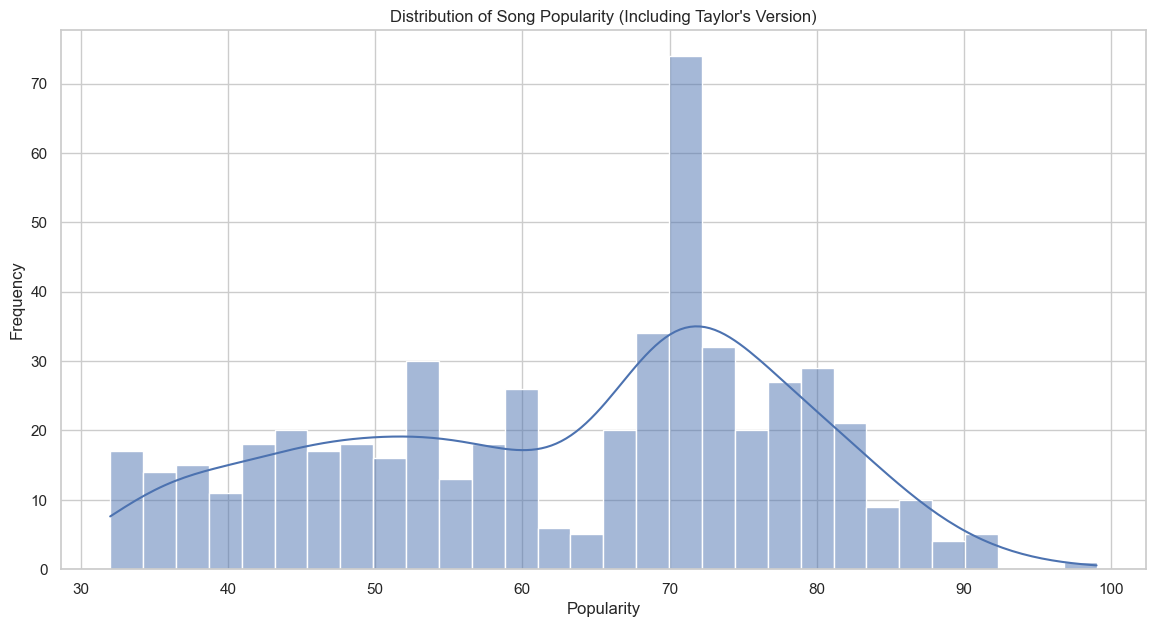

In [376]:
plt.figure(figsize=(14, 7))
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title('Distribution of Song Popularity (Including Taylor\'s Version)')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

In [377]:
df_no_tv = df[~df['name'].str.contains("Taylor's Version")]

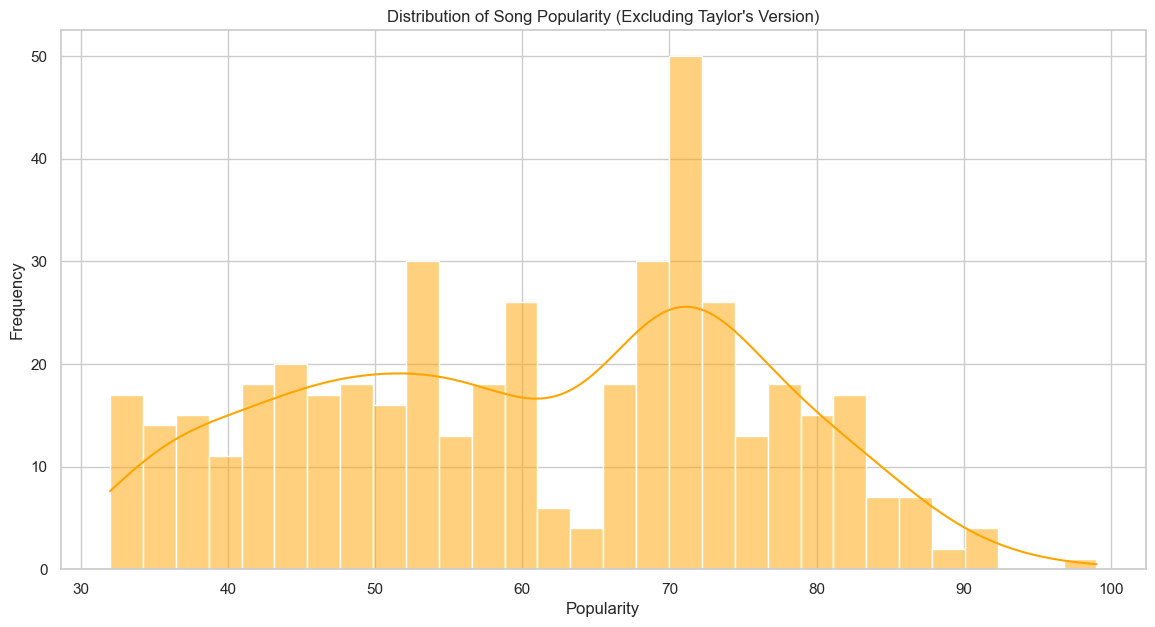

In [378]:
plt.figure(figsize=(14, 7))
sns.histplot(df_no_tv['popularity'], bins=30, kde=True, color='orange')
plt.title('Distribution of Song Popularity (Excluding Taylor\'s Version)')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

In [379]:
df['year'] = pd.to_datetime(df['release_date']).dt.year

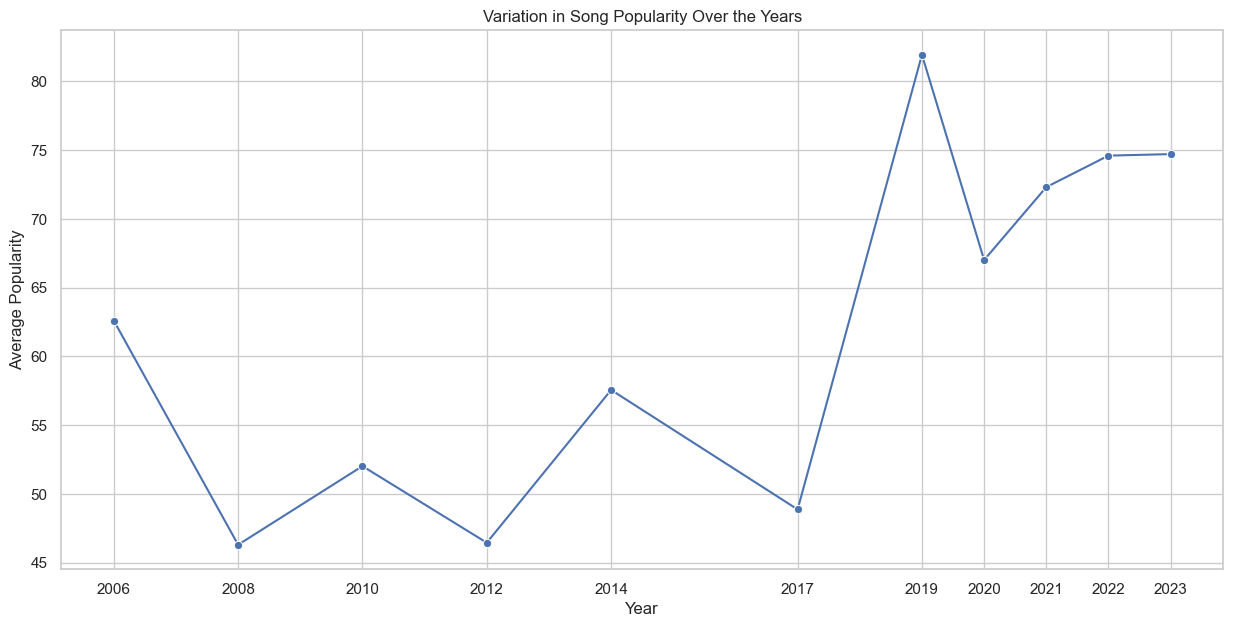

In [380]:
yearly_popularity = df.groupby('year')['popularity'].mean().reset_index()
plt.figure(figsize=(15, 7))
sns.lineplot(data=yearly_popularity, x='year', y='popularity', marker='o')
plt.title('Variation in Song Popularity Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.xticks(yearly_popularity['year'])
plt.grid(True)
plt.show()

The distribution of the popularity of the songs remains almost the same until we reach popularity level 60, and we can see a rise in the graph where Taylor's version songs are included, suggesting that most of Taylor's version songs have a popularity level near 70.


We can also see a sharp rise in popularity in 2017, from less than 50 to around 85. The reason may be the "1989" word tour success and the feud with Kanye West and Kim Kardashian over a song. The song "Look What You Made Me Do" topped charts worldwide, and the accompanying "Reputation Stadium Tour" became the highest-grossing North American tour of all time.

Q2:                     
* Report the average track duration for each album.     
* Your answer should be in mm:ss (minutes:seconds) format rather than the milliseconds that are reported in the original dataset. (10)

In [381]:
album_avg_duration_ms = df.groupby('album')['duration_ms'].mean().astype(int).reset_index()

In [382]:
album_avg_duration_ms['mean_track_duration'] = pd.to_timedelta(album_avg_duration_ms['duration_ms'], unit='ms')
album_avg_duration_ms['mean_track_duration'] = album_avg_duration_ms['mean_track_duration'].apply(lambda x: '{:02}:{:02}'.format(x.seconds//60, x.seconds%60))

album_avg_duration_ms
album_avg_duration_ms[['album','mean_track_duration']].sort_values('mean_track_duration',ascending=False)

,album,mean_track_duration
18,Speak Now World Tour Live,04:57
15,Speak Now,04:47
17,Speak Now (Taylor's Version),04:45
16,Speak Now (Deluxe Edition),04:35
14,Red (Taylor's Version),04:21
6,Fearless Platinum Edition,04:10
4,Fearless,04:07
13,Red (Deluxe Edition),04:06
5,Fearless (Taylor's Version),04:05
12,Red,04:03


The average duration of the track is in the range of 3:23 minutes to 4:57 minutes, where Speak Now World Tour Live had the highest mean duration of the album. and the midnights had the lowest. We can observe a lot of versions of speak now having similar mean track durations.

Q3:     
* Generate correlation heatmaps to visualize the relationships between song features, utilizing a diverging color map with white representing a zero correlation.       
* Identify the top five strongest correlations among these features.    
* Provide an analysis of your findings, including explanations for why certain variables exhibit strong correlations and the potential rationale behind these relationships.



In [383]:
taylor_num=df.loc[:,df.dtypes!=object]
taylor_num = taylor_num.drop('year', axis=1)
taylor_num = taylor_num.drop('Unnamed: 0', axis=1)
correlation_matrix = taylor_num.corr()

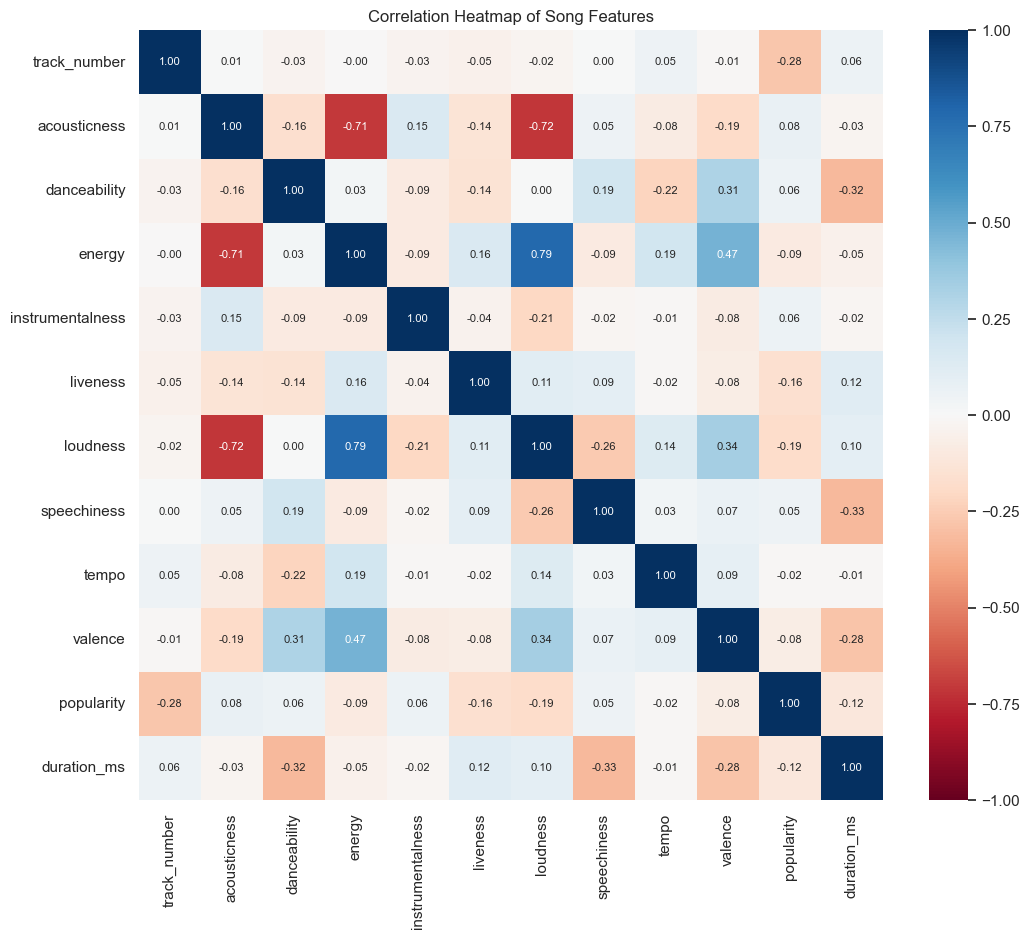

In [384]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,cmap="RdBu",vmax=1,vmin=-1,annot=True, fmt=".2f", annot_kws={"size": 8})
plt.title('Correlation Heatmap of Song Features')
plt.show()


In [385]:
correlation_matrix = correlation_matrix.stack().reset_index()
correlation_matrix.columns = ['var1','var2','corr']
correlation_matrix = correlation_matrix[correlation_matrix['var1'] != correlation_matrix['var2']]
correlation_matrix = correlation_matrix.sort_values('corr', ascending=False, key=abs)
correlation_matrix = correlation_matrix.reset_index(drop=True)
correlation_matrix = correlation_matrix.iloc[::2]
correlation_matrix.head(5)

,var1,var2,corr
0,energy,loudness,0.788294
2,acousticness,loudness,-0.717599
4,acousticness,energy,-0.709822
6,valence,energy,0.474844
8,loudness,valence,0.338557


We see the highest positive correlation between loudness and energy; this shows that with the loudness of the music, the energy of the song increases, which makes sense as high-energy songs are actually a little louder.<br>

As the acousticness of the song decreases, the loudness increases, and as loudness and energy have a positive correlation, we can say that the energy will increase too. This is also shown in the correlation matrix.<br>

Valence checks the positiveness of the songs, and it shows that the more valence the song has, the higher its loudness and energy as lodness and energy are positively correlated.<br>

We see a 0 correlation between danceability and loudness, which shows that there is no relation between these two features.<br>

We see many features in the correlation plot with a near-0 correlation, showing that if one of the features were used to study the other, it would not be possible as there is no relation between them.<br>

The negative correlation between duration_ms and speechiness suggests that as songs get longer, the proportion of the track containing spoken words decreases. Longer songs may incorporate more instrumental sections or extended musical interludes, which dilutes the overall proportion of spoken words.

Q4: 
- Analyze how the position of the track on the album (i.e., track number) influences the song's popularity, considering additional musical features. 
- Specifically, evaluate the correlation between track number and popularity, and then examine if certain musical features (e.g., danceability, energy, acousticness) mediate this relationship. 
- Use both visual and statistical evidence to support your findings. 
- Discuss how these features may interact with track position to affect a song's popularity (10)

In [386]:
model1=smf.ols('popularity ~ track_number', data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     43.67
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           9.53e-11
Time:                        23:26:42   Log-Likelihood:                -2175.5
No. Observations:                 530   AIC:                             4355.
Df Residuals:                     528   BIC:                             4364.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       68.6838      1.100     62.452      0.000      66.523      70.844
track_number    -0.5291      0.080     -6.608      0.000      -0.686      -0.372
==============================================================================
Omnibus:                      147.123   Durbin-Watson:                   0.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.164
Skew:                          -0.165   Prob(JB):                     1.26e-06
Kurtosis:                       1.941   Cond. No.                         23.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [387]:
model2=smf.ols('popularity ~ track_number + danceability + energy + acousticness', data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     12.65
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           7.84e-10
Time:                        23:26:42   Log-Likelihood:                -2172.2
No. Observations:                 530   AIC:                             4354.
Df Residuals:                     525   BIC:                             4376.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       65.6154      5.303     12.372      0.000      55.197      76.034
track_number    -0.5257      0.080     -6.584      0.000      -0.683      -0.369
danceability     8.0978      5.757      1.407      0.160      -3.212      19.407
energy          -4.2622      4.757     -0.896      0.371     -13.608       5.084
acousticness     2.3171      2.824      0.820      0.412      -3.231       7.865
==============================================================================
Omnibus:                      109.823   Durbin-Watson:                   0.316
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.095
Skew:                          -0.147   Prob(JB):                     5.86e-06
Kurtosis:                       1.998   Cond. No.                         171.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [388]:
popularity_track=pd.DataFrame(df.groupby('track_number')['popularity'].mean())

In [389]:
popularity_track.reset_index(inplace=True)

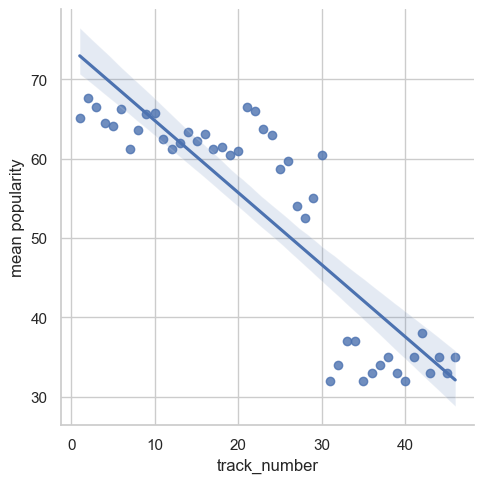

In [390]:
ax = sns.lmplot(data = popularity_track, x='track_number', y='popularity')
ax.set_ylabels('mean popularity')

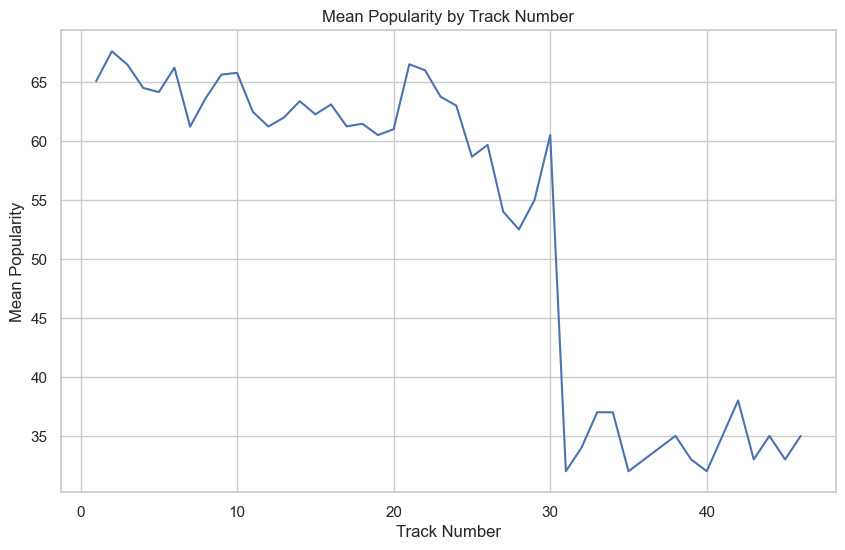

In [391]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=popularity_track, x='track_number', y='popularity')
plt.ylabel('Mean Popularity')
plt.xlabel('Track Number')
plt.title('Mean Popularity by Track Number') 
plt.show()

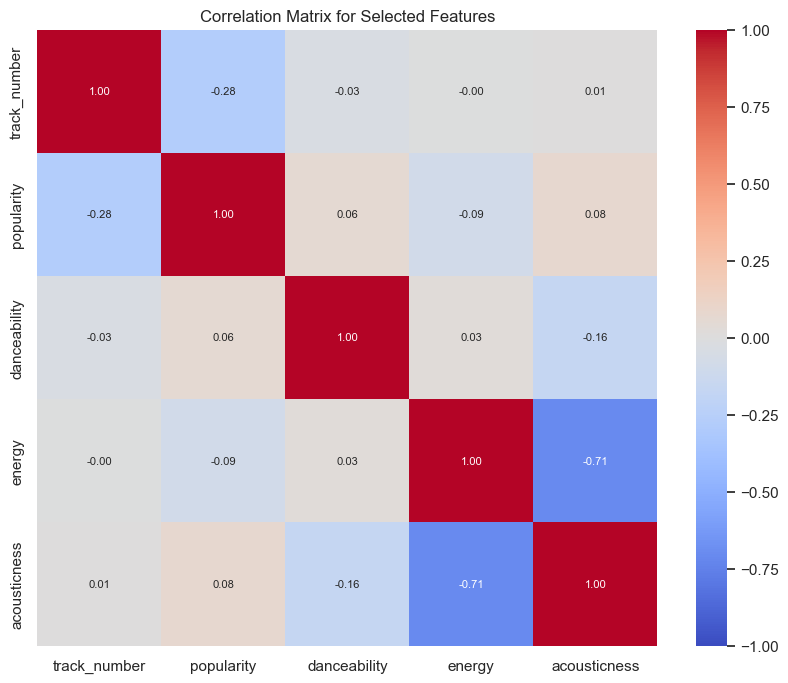

In [392]:
selected_features = ['track_number', 'popularity', 'danceability', 'energy', 'acousticness']
correlation_matrix = df[selected_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,cmap="coolwarm",vmax=1,vmin=-1,annot=True, fmt=".2f", annot_kws={"size": 8})
plt.title('Correlation Matrix for Selected Features')
plt.show()

The popularity of the song decreases as the track number increases; this is the trend observed; it is observed in the OLS model, where the intercept is 65.6154, and with an increase in the track number, it decreases by 0.5257 for every increasing track number.

The features such as danceability, energy, and acousticness are not significant enough in the model as they have a p value greater than 0.05. With the correlation matrix, it is seen that energy and acousticness have a high negative correlation, but that does not give any information about their relationship with popularity. Popularity has very little correlation with these 3 and has a correlation of -0.28 with track_number.

Track_number has almost no correlation with the features danceability, energy, or acousticness, but it still has no effect on popularity.


Q5:
- Explore the characteristics that differentiate popular songs from less popular ones. 
- Divide the songs into popular (popularity rating of 60 or higher) and less popular (popularity rating of less than 60). 
- Conduct a comparative analysis of these two groups across multiple features: danceability, energy, acousticness, and tempo. 
- Use ANOVA tests to determine if differences in these features between popular and less popular songs are statistically significant. 
- Additionally, explore if there's a notable trend in the duration of songs (duration_ms) between the two groups. (15)

In [393]:
df['popular_category']= np.where(df['popularity']>=60, 'popular', 'not_popular')

In [394]:
features = ['danceability', 'energy', 'acousticness', 'tempo']

In [395]:
for feature in features:
    formula = f'{feature} ~ C(popular_category)'
    df_lm = smf.ols(formula, data=df).fit()
    table = sm.stats.anova_lm(df_lm, typ=2)
    print(f"ANOVA for {feature}:\n{table}\n")

ANOVA for danceability:
                       sum_sq     df         F    PR(>F)
C(popular_category)  0.012814    1.0  1.001376  0.317436
Residual             6.756490  528.0       NaN       NaN

ANOVA for energy:
                        sum_sq     df         F    PR(>F)
C(popular_category)   0.241624    1.0  6.654649  0.010159
Residual             19.171166  528.0       NaN       NaN

ANOVA for acousticness:
                        sum_sq     df         F    PR(>F)
C(popular_category)   0.571906    1.0  5.391429  0.020615
Residual             56.008547  528.0       NaN       NaN

ANOVA for tempo:
                            sum_sq     df         F   PR(>F)
C(popular_category)       1.436217    1.0  0.001593  0.96818
Residual             476107.209047  528.0       NaN      NaN



In [396]:
df.groupby('popular_category')['duration_ms'].mean().astype(int).reset_index()

,popular_category,duration_ms
0,not_popular,248105
1,popular,234517


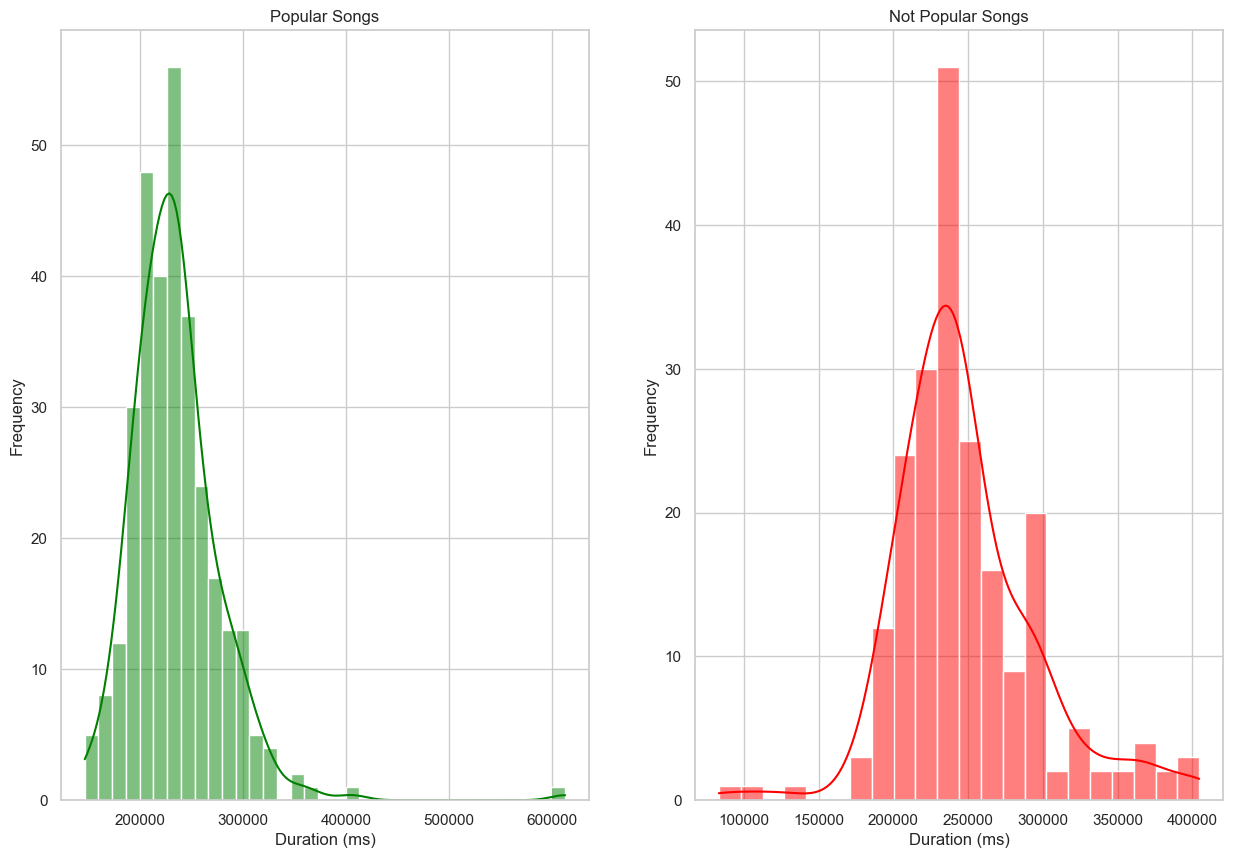

In [397]:
f, ax = plt.subplots(1, 2, figsize=(15,10))
sns.histplot(df[df['popular_category']=='popular']['duration_ms'], kde=True, ax=ax[0], color='green')
ax[0].set_title('Popular Songs')
ax[0].set_xlabel('Duration (ms)')
ax[0].set_ylabel('Frequency')
sns.histplot(df[df['popular_category']=='not_popular']['duration_ms'], kde=True, ax=ax[1], color='red')
ax[1].set_title('Not Popular Songs')
ax[1].set_xlabel('Duration (ms)')
ax[1].set_ylabel('Frequency')
plt.show()

In [398]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
res2 = pairwise_tukeyhsd(endog=df['duration_ms'].astype(int), groups=df['popular_category'])
res2.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
not_popular,popular,-13587.7521,0.0008,-21537.9137,-5637.5904,True


danceability:
The anova shows that the p-value of 0.317436 for danceability indicates that there is no statistically significant difference in danceability across both categories (popular and not popular). The high p-value suggests that any observed differences in danceability could very well be due to random chance.

energy:
The p-value of 0.010159 shows a statistically significant difference in energy levels between both categories. The low p-value indicates that it is unlikely that the observed differences in energy are due to random chance. This suggests that energy might be an important feature distinguishing songs in different popularity categories.

acousticness:
The p-value of 0.020615 also indicates a statistically significant difference in acousticness between both categories. Like energy, acousticness appears to vary systematically with song popularity, suggesting it could be a relevant feature in determining or reflecting a song's popularity.

tempo::
The p-value of 0.96818 suggests that there is no statistically significant difference in tempo between both categories. The extremely high p-value indicates that any differences in tempo are likely due to chance, suggesting tempo may not be a critical factor in the popularity of a song within these categories.

For duration_ms and the popular category, the tukey HSD shows that there is a statistical difference between the mean value of duration_ms for both categories. and the popular category has a lower duration than the non-popular songs

Q6:
- Build a multiple linear regression model to predict the popularity of a song based on a set of acoustic features: 'liveness', 'danceability', 'energy', and 'acousticness'. Evaluate the model by reporting:

    - The coefficient of determination (i.e. $r^2$) for the entire model to understand how well these variables together predict song popularity.
    - The statistical significance of the regression model and each predictor variable within it.
    - Predictions for song popularity at two different levels of 'liveness': 0.22 and 0.50, while holding other variables at their mean values." (20)

In [399]:
taylor_pop_lm = smf.ols('popularity ~ liveness + danceability + energy + acousticness', data=df).fit()
taylor_pop_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     4.328
Date:                Tue, 20 Feb 2024   Prob (F-statistic):            0.00188
Time:                        23:26:43   Log-Likelihood:                -2188.0
No. Observations:                 530   AIC:                             4386.
Df Residuals:                     525   BIC:                             4407.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       62.9373      5.500     11.442      0.000      52.132      73.743
liveness       -15.3336      4.733     -3.239      0.001     -24.632      -6.035
danceability     6.2513      6.006      1.041      0.298      -5.547      18.049
energy          -3.2302      4.912     -0.658      0.511     -12.880       6.420
acousticness     1.6693      2.916      0.572      0.567      -4.059       7.398
==============================================================================
Omnibus:                       57.039   Durbin-Watson:                   0.299
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.052
Skew:                          -0.334   Prob(JB):                     3.63e-06
Kurtosis:                       2.170   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [400]:
liveness_values = [0.22, 0.50]  # Two levels of 'liveness'
danceability_value = df['danceability'].mean()
energy_value = df['energy'].mean()
acousticness_value = df['acousticness'].mean()

In [401]:
test_data = {
    'liveness': liveness_values,
    'danceability': [danceability_value, danceability_value],
    'energy': [energy_value, energy_value],
    'acousticness': [acousticness_value, acousticness_value]
}

In [402]:
test_df = pd.DataFrame(test_data)
test_df

,liveness,danceability,energy,acousticness
0,0.22,0.585285,0.574609,0.319247
1,0.50,0.585285,0.574609,0.319247


In [403]:
predict = taylor_pop_lm.predict(test_df)

In [404]:
print(f"Predicted popularity for liveness=0.22: {predict[0]}")
print(f"Predicted popularity for liveness=0.50: {predict[1]}")

Predicted popularity for liveness=0.22: 61.89956760574775
Predicted popularity for liveness=0.50: 57.60617285839031


The linear regression model that predicts the popularity of a song based on features such as 'liveness', 'danceability', 'energy', and 'acousticness gives a $R^2$ value of 0.032, which indicates relatively low explanatory power. <br>

The model suggests that the liveness has a significant impact on the song's popularity, as it has a p-value of 0.001, which is less than 5% in the ttest. Still, this alone is not enough to learn about the popularity of the songs.

Only liveliness has a p-value less than 0.05, and all the other features have a p-value much greater than 5%, showing that they are not significant in this model. Danceability has a p-value of 0.298; hence, it fails to reject the null hypothesis and is not significant enough.

Similarly, the p-value of energy is 0.511, which is much greater than 0.05. Hence, it fails to reject the null hypothesis and is not significant enough.

Similarly, the p-value of acousticness is 0.567, which is much greater than 0.05. Hence, it fails to reject the null hypothesis and is not significant enough.












Predictions for song 'popularity' at two different levels of 'liveness' of 0.22 and 0.50, while holding other variables at their mean values of 61.8995 and 57.6061, respectively. It shows that as liveness increases, popularity decreases.

Q7:
- In addition to analyzing the popularity scores of original vs. re-recorded songs by Taylor Swift, evaluate the differences in their musical characteristics, including danceability, energy, acousticness, and duration_ms. Perform the following analyses:

    - a) Create visualizations that compare the distribution of popularity scores, as well as the mentioned acoustic features, between original and re-recorded songs.

    - b) Conduct statistical tests to determine if there are significant differences in popularity, danceability, energy, acousticness, and duration between the original and re-recorded songs. Report which versions are more favorable in terms of popularity and how the musical characteristics have changed in the re-recorded versions. 
- hint: The re-recorded ones have `(Taylor’s version)` at the end of the album name. (20)

In [405]:
df['original_version'] = np.where(df['album'].str.contains("Taylor's Version"), 'Re-recorded', 'Original')

In [406]:
def plot_for_different_versions(feature):
    sns.set_theme(style='whitegrid')
    f, ax = plt.subplots(1, 2, figsize=(15,10))
    f.subplots_adjust( hspace=0.5)
    sns.boxplot(data=df, x='original_version', y=feature, ax=ax[0])
    ax[0].set(xlabel='Version', ylabel=feature, title='Distribution by Version')
    sns.histplot(data=df, x=feature, hue='original_version', kde=True, ax=ax[1], palette='coolwarm')
    ax[1].set(xlabel=feature, ylabel='Frequency', title='Distribution by Version')



In [407]:
def check_difference_in_versions(feature):
    res2 = pairwise_tukeyhsd(endog=feature, groups=df['original_version'])
    print(res2.summary())

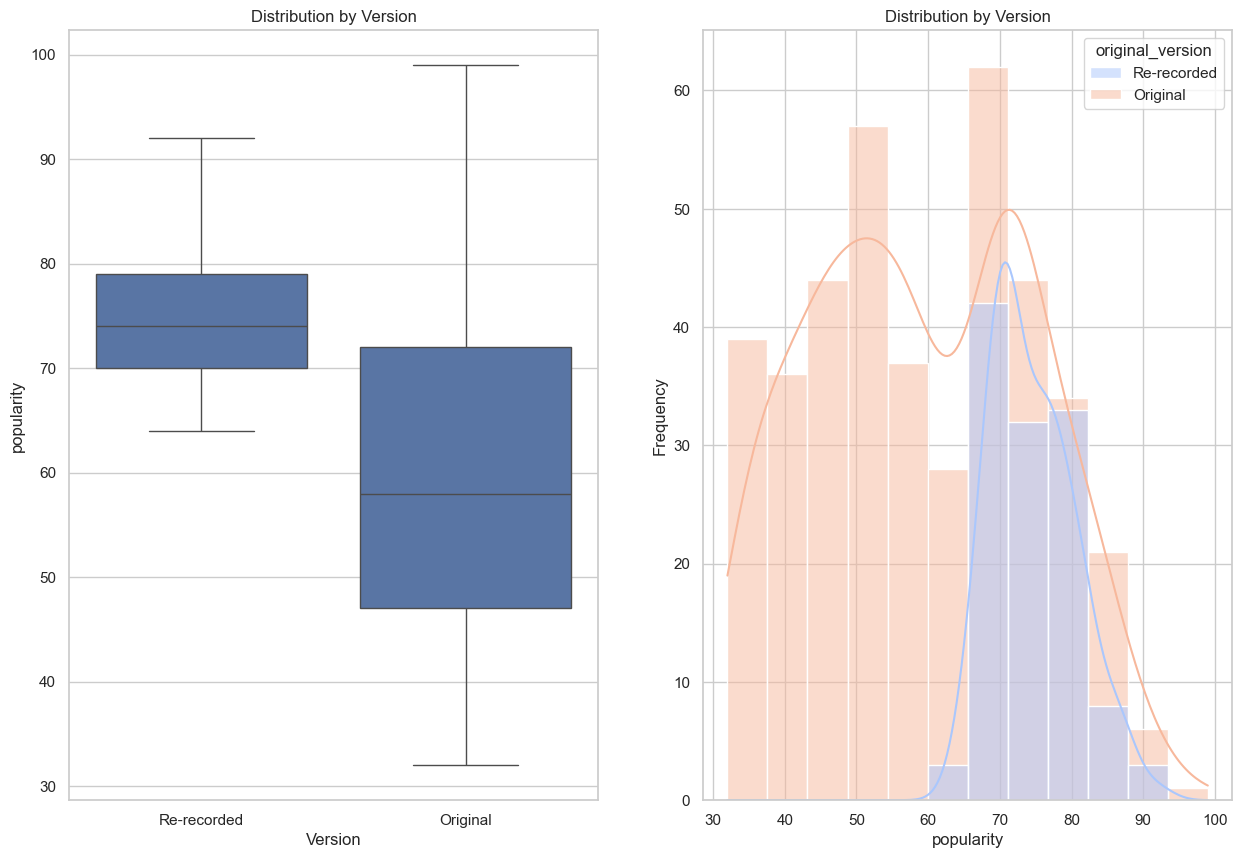

In [408]:
plot_for_different_versions('popularity')

In [409]:
check_difference_in_versions(df['popularity'])

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1     group2   meandiff p-adj  lower   upper  reject
----------------------------------------------------------
Original Re-recorded  15.3178   0.0 12.4981 18.1376   True
----------------------------------------------------------


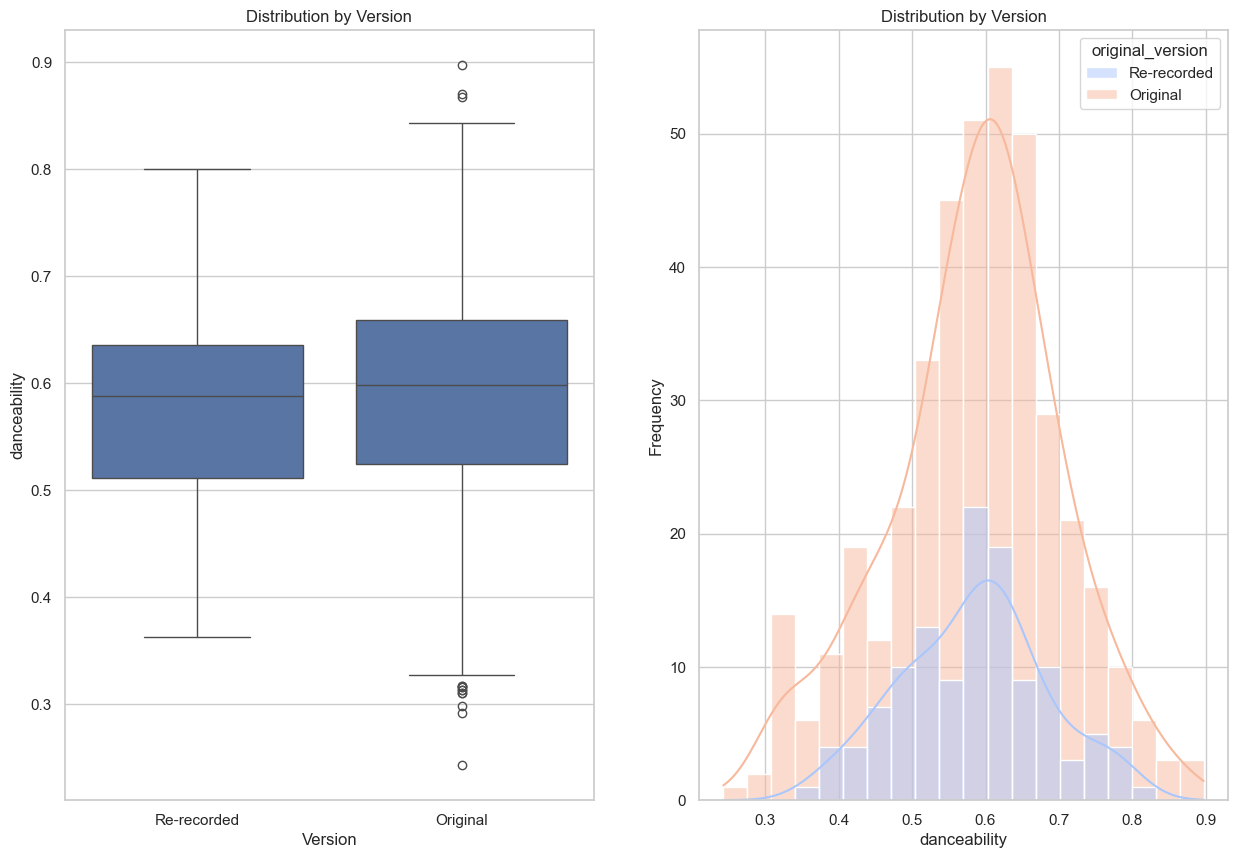

In [410]:
plot_for_different_versions('danceability')

In [411]:
check_difference_in_versions(df['danceability'])

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1     group2   meandiff p-adj   lower  upper  reject
----------------------------------------------------------
Original Re-recorded  -0.0016 0.8899 -0.0246 0.0214  False
----------------------------------------------------------


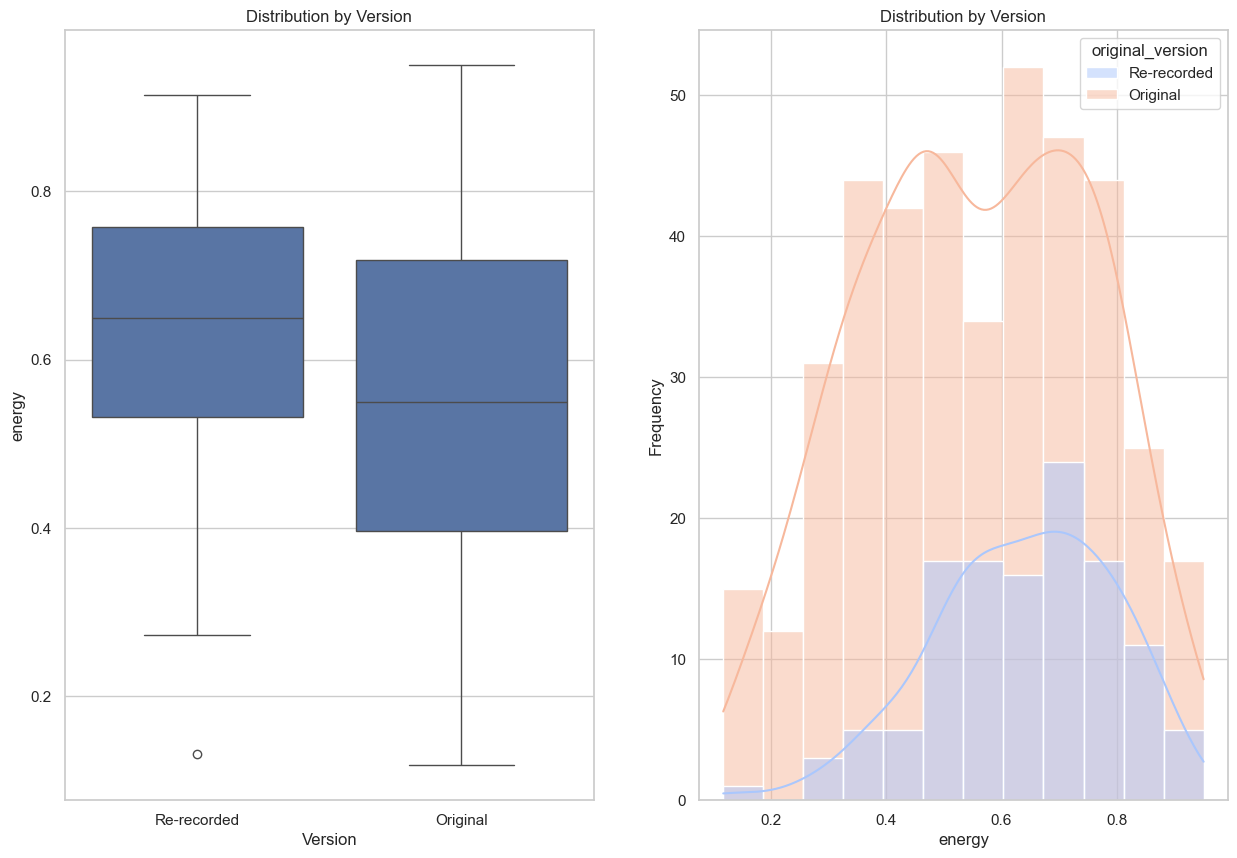

In [412]:
plot_for_different_versions('energy')

In [413]:
check_difference_in_versions(df['energy'])

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1     group2   meandiff p-adj lower  upper  reject
--------------------------------------------------------
Original Re-recorded   0.0825   0.0 0.0441 0.1208   True
--------------------------------------------------------


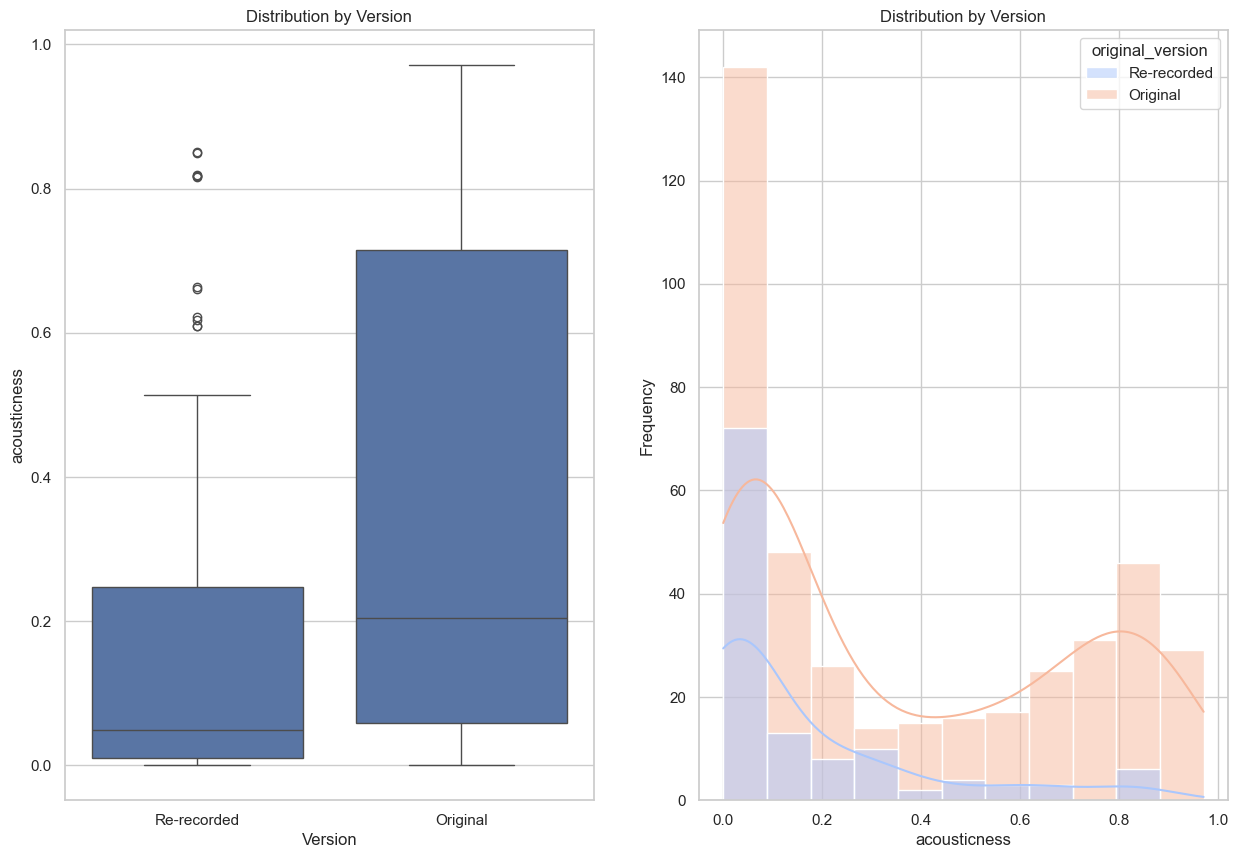

In [414]:
plot_for_different_versions('acousticness')

In [415]:
check_difference_in_versions(df['acousticness'])

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1     group2   meandiff p-adj lower   upper  reject
---------------------------------------------------------
Original Re-recorded  -0.2048   0.0 -0.269 -0.1406   True
---------------------------------------------------------


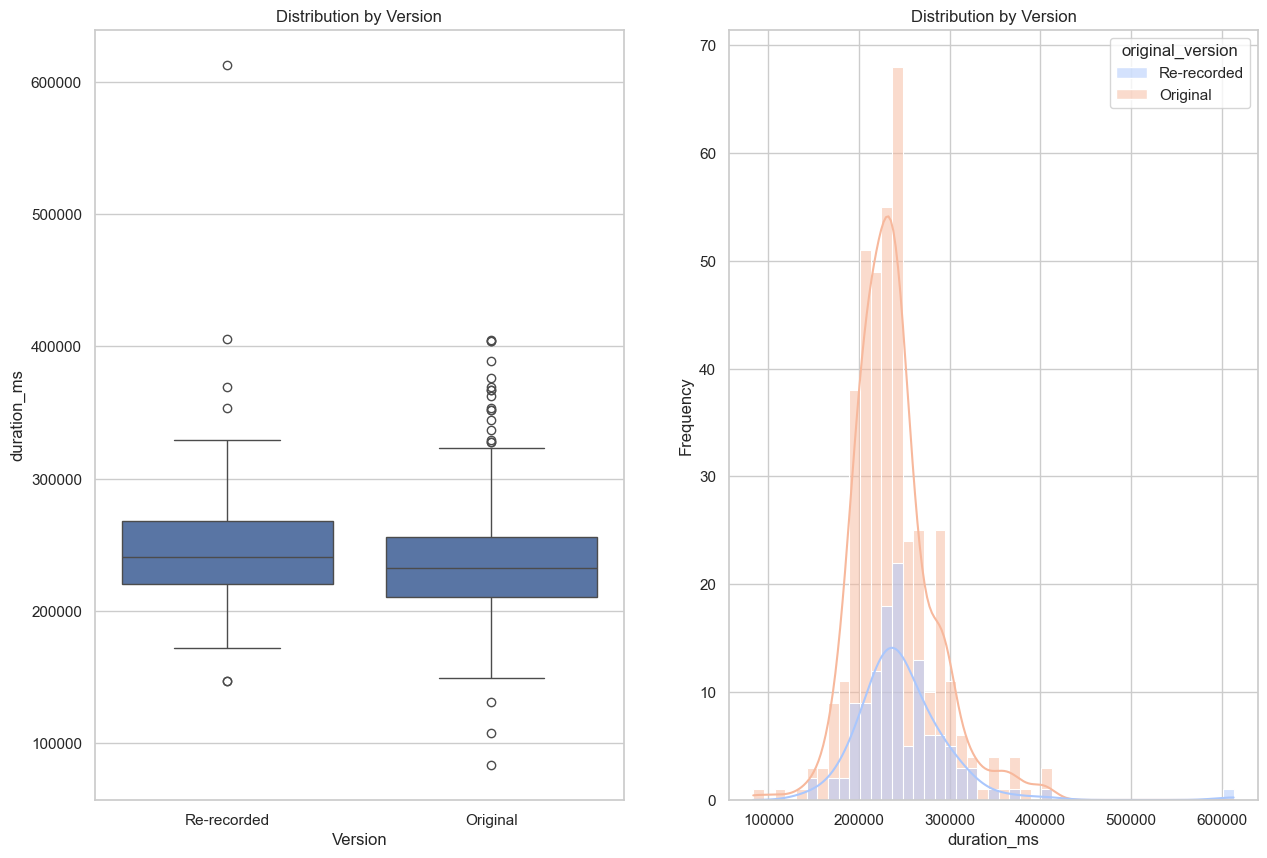

In [416]:
plot_for_different_versions('duration_ms')

In [417]:
check_difference_in_versions(df['duration_ms'])

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1     group2    meandiff  p-adj   lower     upper    reject
-----------------------------------------------------------------
Original Re-recorded 11088.3984  0.02 1751.5269 20425.2699   True
-----------------------------------------------------------------


The distribution of popularity for both original and re-recorded songs is very different, as there are very few re-recorded songs with a popularity less than 60. where, as for the original, it ranges from 30 to 100. The box plot also shows that there are differences in the mean value and overall distribution.
The Tukey HSD test also supports the claim, as the null hypothesis is rejected, indicating that there is a significant difference between the popularity means of the "original" and "re-recorded" songs.

In terms of popularity, the re-recorded songs are more popular in comparison to the originals.

For danceability, the similar box heights suggest comparable variability in danceability between the two versions. The histogram indicates that both distributions are approximately normally distributed.
The Tukey HSD test also supports the claim, as the null hypothesis is not rejected, indicating that there isn't any significant difference between the danceability of the "original" and "re-recorded" songs.

for energy The boxplot and histogram both show that the median energy level for the "original" version appears to be slightly lower than that for the "re-recorded" version. Both distributions seem to have a similar shape.
The Tukey HSD test results show that the null hypothesis is rejected, indicating that there is a significant difference between the energy means of the "original" and "re-recorded" songs.

For the acousticness, there is a difference in the median value and the spread of the data, indicating a difference in distribution, which is evident in the histogram. The distributions for both re-recored and original are different.
The Tukey HSD test results show that the null hypothesis is rejected, indicating that there is a significant difference between the acoustic means of the "original" and "re-recorded" songs.

For the duration_ms the median value, represented by the line in the middle of the box, seems similar for both song versions, suggesting that the typical length of a track does not change significantly from the original to the re-recorded songs.The KDE curve for the "original" songs seems to have a broader base, suggesting greater variation in track durations, as indicated by the boxplot.
The Tukey HSD test results show that the null hypothesis is rejected, indicating that there is a significant difference between the duration_ms means of the "original" and "re-recorded" songs.

BONUS, worth up to 2 points: How would you determine whether [Taylor Swift has had an effect on the popularity of football](https://duckduckgo.com/?q=taylor+swift+football&atb=v314-1&ia=web)?  What data would you need?  What analysis would you perform?  What would you expect the results to be?


Data collection:
we can collect data such as,
1. Popularity of football over time
2. Taylor Swift's involvement with football teams, players, or events.
3. Trends on social media
4. viewership ratings
5. streaming data
6. surveys about football from taylor swift's fans
   
Analysis
1. Time Series Analysis:examine trends in football's popularity and see if there are any spikes or changes that coincide with Taylor Swift’s football-related activities<br>
2. Causal Impact Analysis: Use causal impact analysis or interrupted time series analysis to assess whether there is a statistically significant change in the popularity metrics following Taylor Swift’s involvement, while controlling for other variables<br>
3. Sentiment Analysis: Analyze sentiment in social media mentions and press coverage related to football and Taylor Swift to understand public perception and whether it becomes more positive after her involvement.<br>
Results: 

(I believe it would have a positive effect based on the recent events, but we have to test this hypothesis on the data.)<br>
If Taylor Swift has a positive effect on the popularity of football, we would expect to see a significant increase in the metrics of popularity following her engagement with the sport.<br>
The increase should be consistent and not just a one-time spike to suggest a true effect.<br>
Sentiment analysis should show a positive shift in the public’s perception of football associated with her involvement.<br>
If it has no effect, then we will see no changes in popularity or similar trends as before, after her engagement with the sport.<br>
It is possible that Taylor's involvement coincides with some other factor that is affecting the popularity of football. Hence, we cannot conclude that there is a cause.<br>


### Submit your completed assignment in both IPYNB and HTML formats.